# Step 1 Box plot  (distribution #comments/each post among different facebook fans pages)

In [2]:
%matplotlib inline

import pyes
import json
import pandas as pd
import seaborn as sns

def pp(o): 
    print (json.dumps(o, indent=1))

def boxPlotFBFansPageComp(fids,host,pngFilePath,outlierFilter):
    data=[]
    for fid in fids:
        conn = pyes.es.ES(host)
        tq = pyes.query.TermQuery(field="fid", value=fid)
        tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
        qsearch = pyes.query.Search(tq) 
        qsearch.agg.add(tagg) 
        result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')
        #print json.dumps(result.aggs,indent=2) 
        for fidpid_summary in result.aggs["pid"]["buckets"]:
            #print fidpid_summary["key"] + ',' + str(fidpid_summary["doc_count"])
            if fidpid_summary["doc_count"] < outlierFilter or outlierFilter < 0:
                data.append([fidpid_summary["doc_count"],fid,fidpid_summary["key"]])

    df=pd.DataFrame(data,columns={'count','fid','fidpid'})
    sns.set(style="ticks")
    sns_plot=sns.boxplot(x="fid", y="count", data=df, palette="PRGn")
    fig=sns_plot.get_figure()
    fig.savefig(pngFilePath)

# Step 2: Please assign several Facebook fan pages and parameters 

## (code-customerized by yourself is required!)


pyes object <pyes.es.ES object at 0x10965e6d8> is being destroyed, but bulk operations have not been flushed. Call force_bulk()!
pyes object <pyes.es.ES object at 0x10a6c8a90> is being destroyed, but bulk operations have not been flushed. Call force_bulk()!


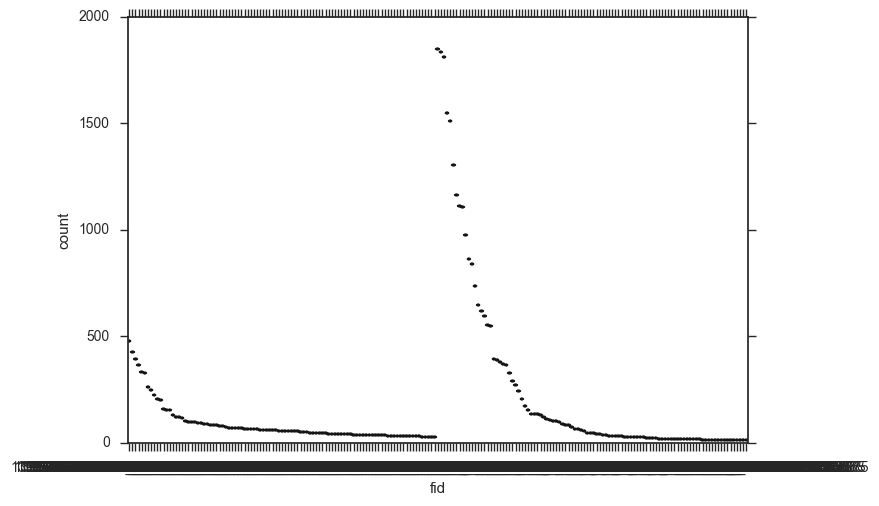

In [3]:
#assign the facebook fans page that you prefered
fids=['139624776093433','180080052032125']

#elasticsearch repository provided by this course
host = '127.0.0.1:9200'

#output box plot PNG figure
pngFilePath="output.png"

#outlier threshold you want to filter (if you give minus ONE, none of outlier is filtered.)
outlierFilter=3000

#obtain the result and save as "pngFilePath" given from you
boxPlotFBFansPageComp(fids,host,pngFilePath,outlierFilter)

# Step 3: Box plot (#post per month for specified page)¶

In [4]:
import pyes
import json
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt


def boxPlotNumofPostPerMonth(fid,host,lowerbound,upperbound,pngFilePath):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    #tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg = pyes.aggs.DateHistogramAgg('month' ,field='created_time', interval='month',sub_aggs=[])
    tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg.sub_aggs.append(tagg) 
    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(DHAgg) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')

    data=[]
    for r in result.aggs["month"]["buckets"]:
        for pid in r["pid"]["buckets"]:
            monthyear=datetime.datetime.strptime(r["key_as_string"], "%Y-%m-%dT%H:%M:%S.%fZ").strftime('%Y/%m')
            data.append([pid["doc_count"],monthyear,pid["key"],r["key"]])

    df=pd.DataFrame(data,columns={'date','count','fid','pid'})
    sns.set(style="ticks")
    sns_plot=sns.boxplot(x="date", y="count", data=df, palette="PRGn")
    fig=sns_plot.get_figure()
    plt.ylim(lower_bound, upper_bound)
    fig.savefig(pngFilePath)

# Step 4: Please assign several Facebook fan pages and parameters
(code-customerized by yourself is required!)

pyes object <pyes.es.ES object at 0x10e989eb8> is being destroyed, but bulk operations have not been flushed. Call force_bulk()!


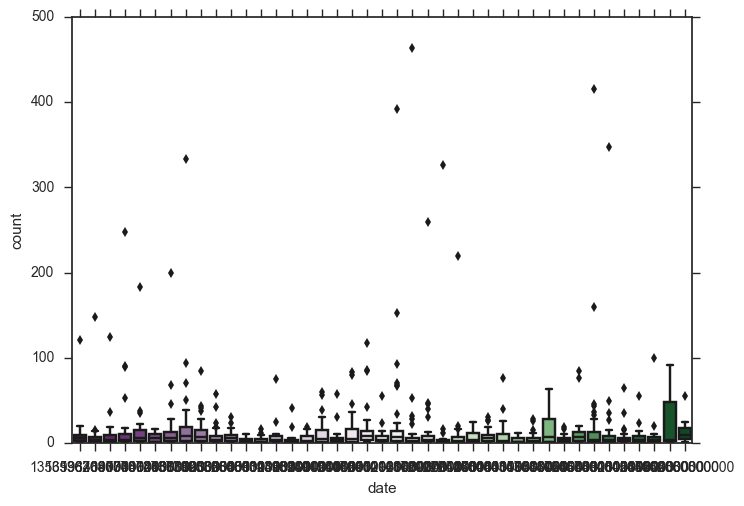

In [5]:
host = '127.0.0.1:9200'
lower_bound = 0
upper_bound = 500
fid="139624776093433"
pngFilePath="output3.png"
boxPlotNumofPostPerMonth(fid,host,lower_bound,upper_bound,pngFilePath)

pyes object <pyes.es.ES object at 0x10ee47be0> is being destroyed, but bulk operations have not been flushed. Call force_bulk()!


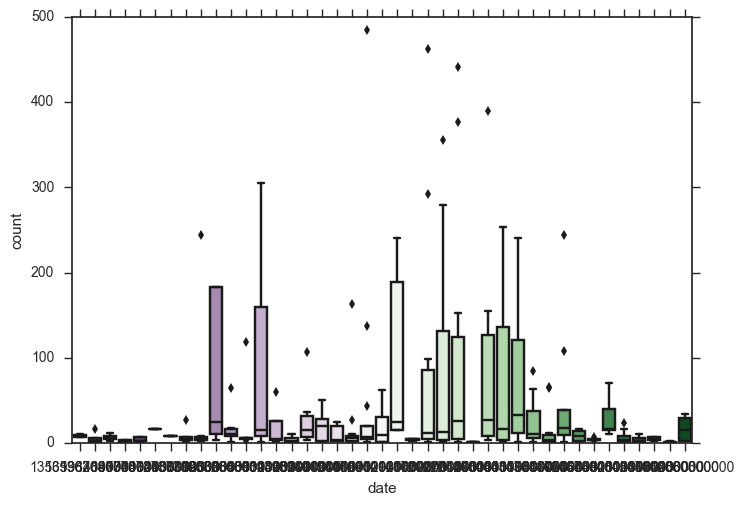

In [6]:
host = '127.0.0.1:9200'
lower_bound = 0
upper_bound = 500
fid="180080052032125"
pngFilePath="output4.png"
boxPlotNumofPostPerMonth(fid,host,lower_bound,upper_bound,pngFilePath)